In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
onl = pd.read_excel("Online Retail.xlsx")

# 1. Khám phá dữ liệu Online Retail

Trong phần này, chúng ta sẽ đọc dữ liệu, xem kích thước, kiểu dữ liệu, các giá trị đầu tiên và thông tin tổng quan về bộ dữ liệu Online Retail. Mục đích là để hiểu cấu trúc, phạm vi và các đặc điểm cơ bản của dữ liệu trước khi tiến hành các bước xử lý tiếp theo.

In [4]:
# Xem kích thước và các dòng đầu tiên của dữ liệu
print("Kích thước dữ liệu:", onl.shape)
display(onl.head())

# Thông tin tổng quan về kiểu dữ liệu và giá trị null
onl.info()

# Thống kê mô tả sơ bộ cho các thuộc tính số
display(onl.describe())

Kích thước dữ liệu: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# 2. Tiền xử lý dữ liệu

Tiền xử lý dữ liệu là bước quan trọng để đảm bảo dữ liệu sạch và phù hợp cho phân tích. Chúng ta sẽ kiểm tra và xử lý giá trị thiếu, dữ liệu trùng lặp, chuyển đổi kiểu dữ liệu phù hợp, và loại bỏ các giao dịch bị hủy hoặc có giá trị âm.

In [5]:
# Kiểm tra giá trị thiếu
missing = onl.isnull().sum()
print("Số lượng giá trị thiếu mỗi cột:\n", missing)

# Xử lý giá trị thiếu: loại bỏ các dòng thiếu CustomerID (nếu cần)
onl_clean = onl.dropna(subset=['CustomerID'])

# Kiểm tra dữ liệu trùng lặp
duplicates = onl_clean.duplicated().sum()
print("Số dòng trùng lặp:", duplicates)
onl_clean = onl_clean.drop_duplicates()

# Chuyển đổi kiểu dữ liệu cho cột InvoiceDate
onl_clean['InvoiceDate'] = pd.to_datetime(onl_clean['InvoiceDate'])

# Loại bỏ giao dịch bị hủy (InvoiceNo bắt đầu bằng 'C') và giá trị âm
onl_clean = onl_clean[~onl_clean['InvoiceNo'].astype(str).str.startswith('C')]
onl_clean = onl_clean[(onl_clean['Quantity'] > 0) & (onl_clean['UnitPrice'] > 0)]

# Tạo cột TotalPrice
onl_clean['TotalPrice'] = onl_clean['Quantity'] * onl_clean['UnitPrice']

print("Dữ liệu sau khi làm sạch:", onl_clean.shape)

Số lượng giá trị thiếu mỗi cột:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Số dòng trùng lặp: 5225
Dữ liệu sau khi làm sạch: (392692, 9)


# 3. Phân tích tổng quan các thuộc tính

Ở phần này, chúng ta sẽ thống kê mô tả cho các thuộc tính số và phân loại, đồng thời phân tích ý nghĩa từng thuộc tính trong ngữ cảnh bán lẻ trực tuyến.

In [6]:
# Thống kê mô tả cho các thuộc tính số
display(onl_clean[['Quantity', 'UnitPrice', 'TotalPrice']].describe())

# Thống kê số lượng giá trị duy nhất cho các thuộc tính phân loại
for col in ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']:
    print(f"Số lượng giá trị duy nhất của {col}: {onl_clean[col].nunique()}")

# Phân tích ý nghĩa các thuộc tính
print("""
- InvoiceNo: Mã hóa đơn, giúp xác định từng giao dịch.
- StockCode: Mã sản phẩm, dùng để phân biệt các mặt hàng.
- Description: Mô tả sản phẩm.
- Quantity: Số lượng sản phẩm được mua trong mỗi giao dịch.
- InvoiceDate: Thời điểm giao dịch diễn ra.
- UnitPrice: Giá bán mỗi sản phẩm.
- CustomerID: Mã khách hàng, giúp phân tích hành vi mua sắm.
- Country: Quốc gia của khách hàng.
- TotalPrice: Tổng giá trị của từng dòng giao dịch.
""")

,Quantity,UnitPrice,TotalPrice
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,22.631500
std,180.492832,22.241836,311.099224
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


Số lượng giá trị duy nhất của InvoiceNo: 18532
Số lượng giá trị duy nhất của StockCode: 3665
Số lượng giá trị duy nhất của Description: 3877
Số lượng giá trị duy nhất của CustomerID: 4338
Số lượng giá trị duy nhất của Country: 37

- InvoiceNo: Mã hóa đơn, giúp xác định từng giao dịch.
- StockCode: Mã sản phẩm, dùng để phân biệt các mặt hàng.
- Description: Mô tả sản phẩm.
- Quantity: Số lượng sản phẩm được mua trong mỗi giao dịch.
- InvoiceDate: Thời điểm giao dịch diễn ra.
- UnitPrice: Giá bán mỗi sản phẩm.
- CustomerID: Mã khách hàng, giúp phân tích hành vi mua sắm.
- Country: Quốc gia của khách hàng.
- TotalPrice: Tổng giá trị của từng dòng giao dịch.



# 4. Trực quan hóa phân phối số lượng và giá trị giao dịch

Chúng ta sẽ vẽ các biểu đồ histogram và boxplot cho Quantity, UnitPrice, và TotalPrice để quan sát phân phối dữ liệu, phát hiện các giá trị bất thường, và hiểu rõ hơn về đặc điểm của các giao dịch.

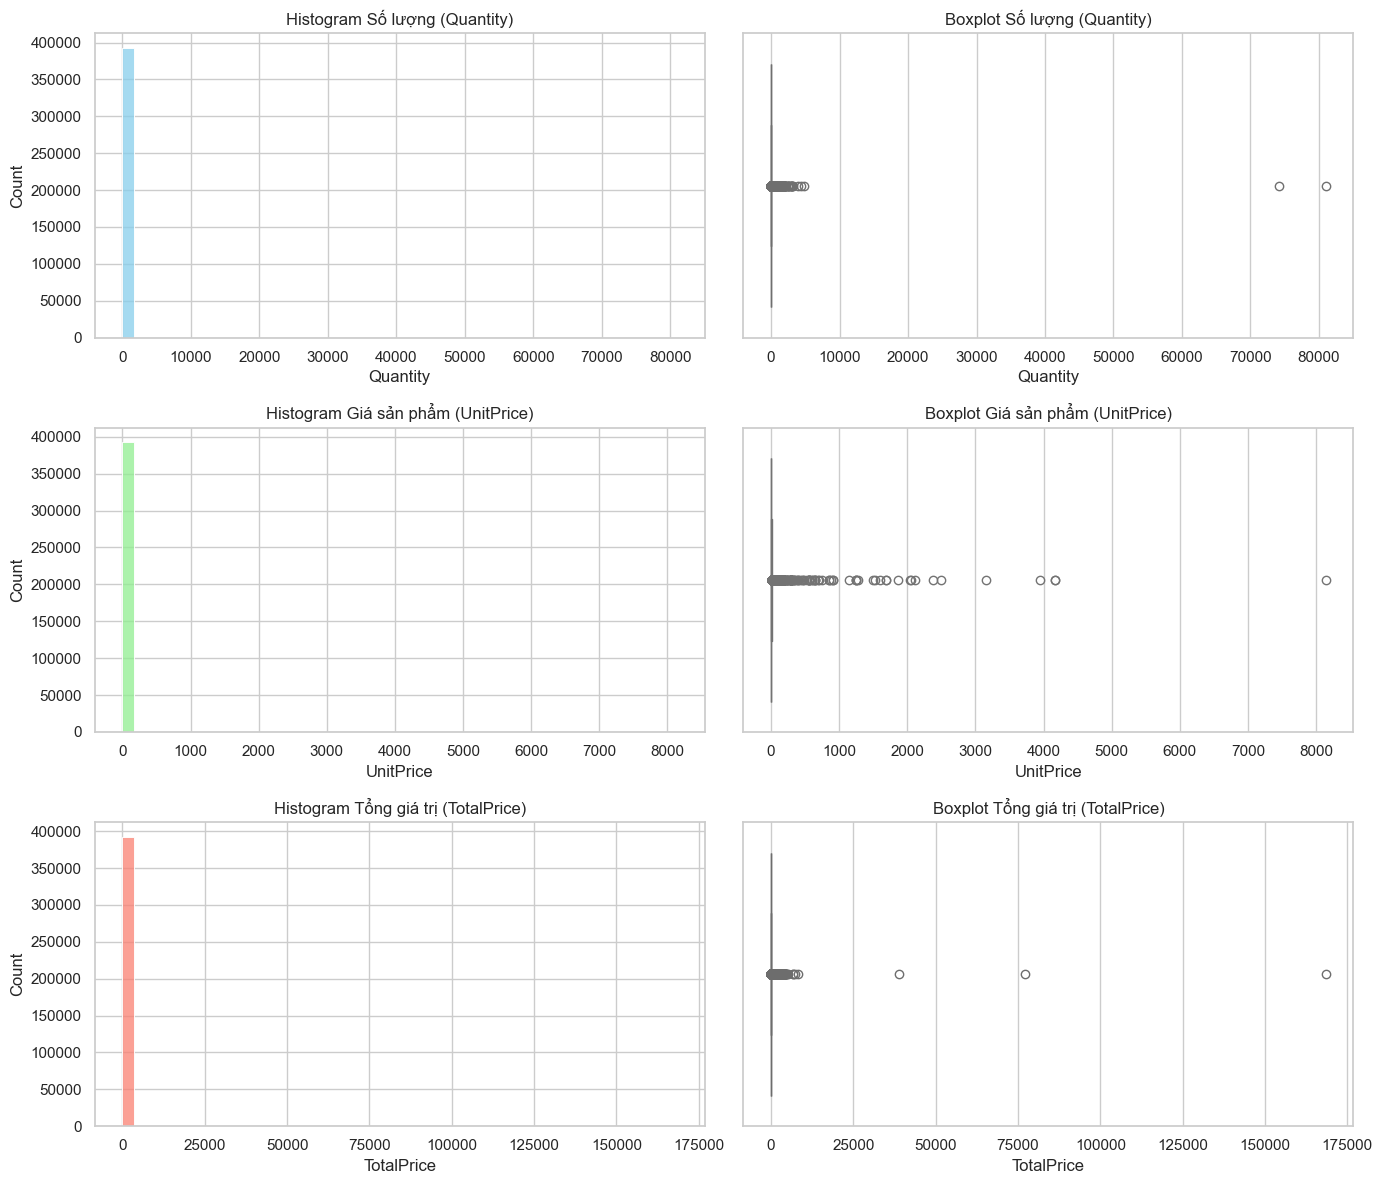

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Histogram
sns.histplot(onl_clean['Quantity'], bins=50, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Histogram Số lượng (Quantity)')
sns.histplot(onl_clean['UnitPrice'], bins=50, ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Histogram Giá sản phẩm (UnitPrice)')
sns.histplot(onl_clean['TotalPrice'], bins=50, ax=axes[2,0], color='salmon')
axes[2,0].set_title('Histogram Tổng giá trị (TotalPrice)')

# Boxplot
sns.boxplot(x=onl_clean['Quantity'], ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Boxplot Số lượng (Quantity)')
sns.boxplot(x=onl_clean['UnitPrice'], ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Boxplot Giá sản phẩm (UnitPrice)')
sns.boxplot(x=onl_clean['TotalPrice'], ax=axes[2,1], color='salmon')
axes[2,1].set_title('Boxplot Tổng giá trị (TotalPrice)')

plt.tight_layout()
plt.show()

**Mục đích biểu đồ:**
- Histogram giúp quan sát phân phối tổng thể, phát hiện các giá trị phổ biến và bất thường.
- Boxplot giúp nhận diện các ngoại lệ (outlier) và so sánh phạm vi giá trị.

**Nhận xét:**
- Quantity và TotalPrice thường phân phối lệch phải, có nhiều giá trị nhỏ và một số giá trị lớn bất thường.
- UnitPrice đa số tập trung ở mức thấp, một số sản phẩm có giá rất cao (cần kiểm tra kỹ hơn).

# 5. Phân tích khách hàng và quốc gia

Phân tích số lượng giao dịch và tổng giá trị theo CustomerID và Country giúp xác định khách hàng lớn, quốc gia nổi bật, từ đó đưa ra chiến lược kinh doanh phù hợp.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24048\3473110024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='Blues_d')


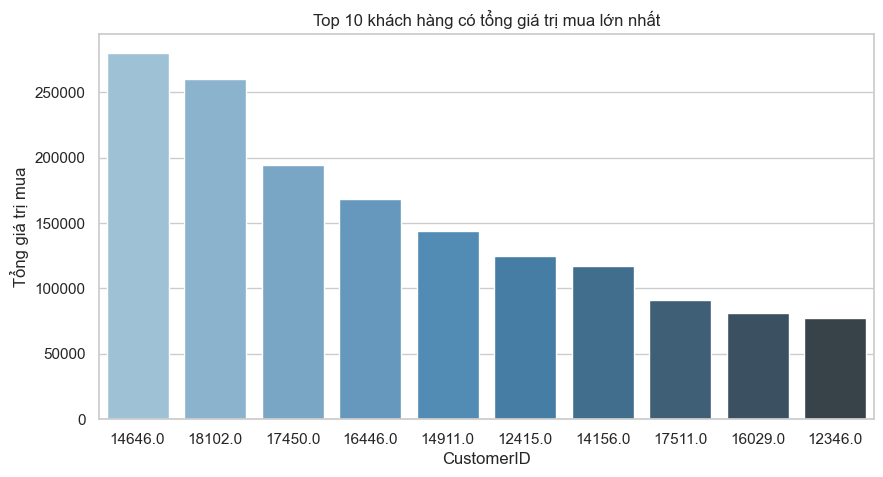

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24048\3473110024.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index[:10], y=country_sales.values[:10], palette='Greens_d')


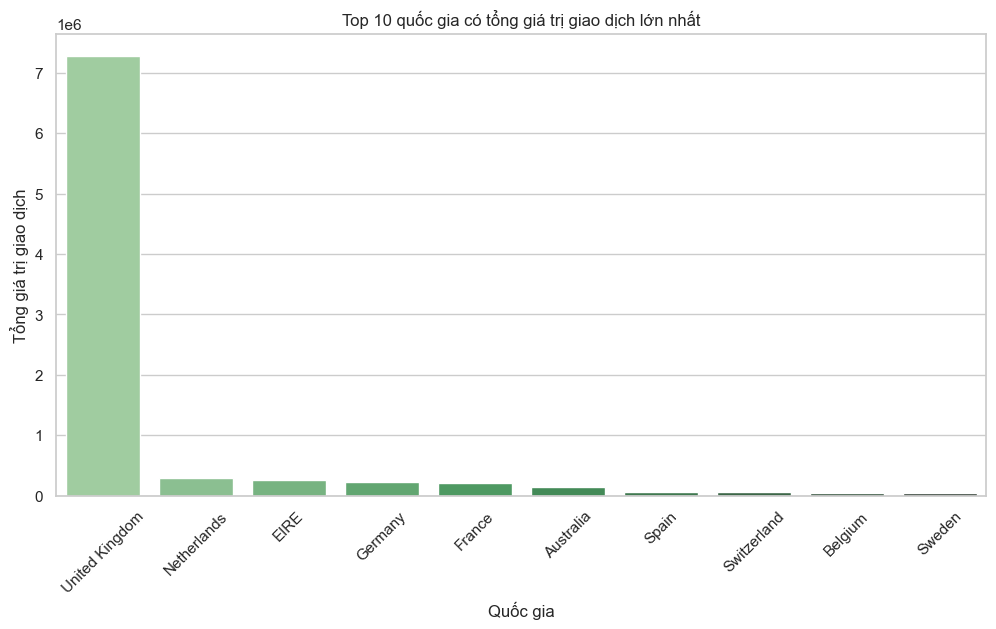

In [8]:
# Top 10 khách hàng có tổng giá trị mua lớn nhất
top_customers = onl_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='Blues_d')
plt.title('Top 10 khách hàng có tổng giá trị mua lớn nhất')
plt.xlabel('CustomerID')
plt.ylabel('Tổng giá trị mua')
plt.show()

# Top 10 quốc gia có tổng giá trị giao dịch lớn nhất (loại trừ UK nếu muốn so sánh các nước khác)
country_sales = onl_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.index[:10], y=country_sales.values[:10], palette='Greens_d')
plt.title('Top 10 quốc gia có tổng giá trị giao dịch lớn nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng giá trị giao dịch')
plt.xticks(rotation=45)
plt.show()

**Phân tích:**
- Các khách hàng lớn đóng góp phần lớn doanh thu, cần tập trung chăm sóc nhóm này.
- Quốc gia có doanh thu cao nhất thường là UK, các quốc gia khác có thể là thị trường tiềm năng nếu tăng cường quảng bá.
- Biểu đồ giúp xác định đối tượng khách hàng và thị trường mục tiêu.

# 6. Phát hiện ngoại lệ và xử lý

Sử dụng biểu đồ và thống kê để phát hiện các giá trị ngoại lệ (outlier) trong Quantity, UnitPrice, TotalPrice. Phân tích nguyên nhân và xử lý phù hợp để đảm bảo dữ liệu không bị méo mó.

Số lượng ngoại lệ TotalPrice: 31231


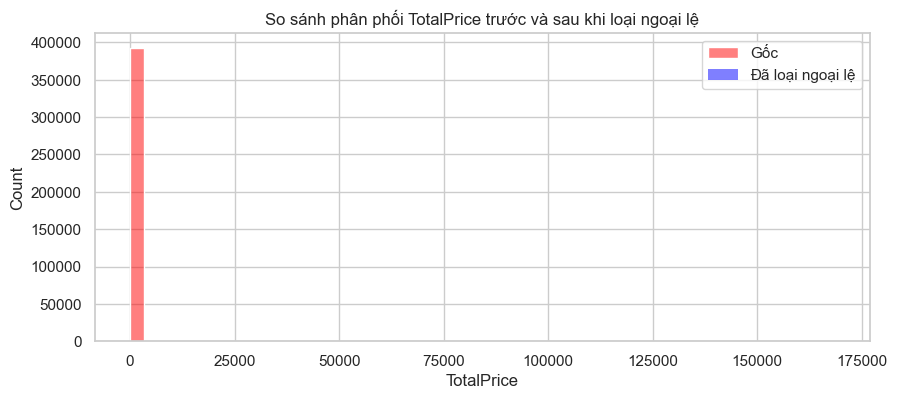

In [9]:
# Xác định ngưỡng ngoại lệ bằng IQR cho TotalPrice
Q1 = onl_clean['TotalPrice'].quantile(0.25)
Q3 = onl_clean['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (onl_clean['TotalPrice'] < (Q1 - 1.5 * IQR)) | (onl_clean['TotalPrice'] > (Q3 + 1.5 * IQR))
print("Số lượng ngoại lệ TotalPrice:", outlier_mask.sum())

# Lọc dữ liệu không có ngoại lệ TotalPrice
onl_no_outlier = onl_clean[~outlier_mask]

# So sánh phân phối trước và sau khi loại ngoại lệ
plt.figure(figsize=(10,4))
sns.histplot(onl_clean['TotalPrice'], bins=50, color='red', label='Gốc', alpha=0.5)
sns.histplot(onl_no_outlier['TotalPrice'], bins=50, color='blue', label='Đã loại ngoại lệ', alpha=0.5)
plt.legend()
plt.title('So sánh phân phối TotalPrice trước và sau khi loại ngoại lệ')
plt.show()

**Nhận xét:**
- Ngoại lệ thường do các giao dịch bất thường (mua số lượng lớn, giá trị cao bất thường).
- Loại bỏ ngoại lệ giúp phân tích chính xác hơn, tránh bị ảnh hưởng bởi các giá trị cực đoan.

# 7. Phân tích mối quan hệ giữa các thuộc tính

Phân tích mối quan hệ giữa Quantity, UnitPrice, TotalPrice,... giúp hiểu rõ hơn về hành vi mua sắm, phát hiện các xu hướng và mối liên hệ tiềm năng.

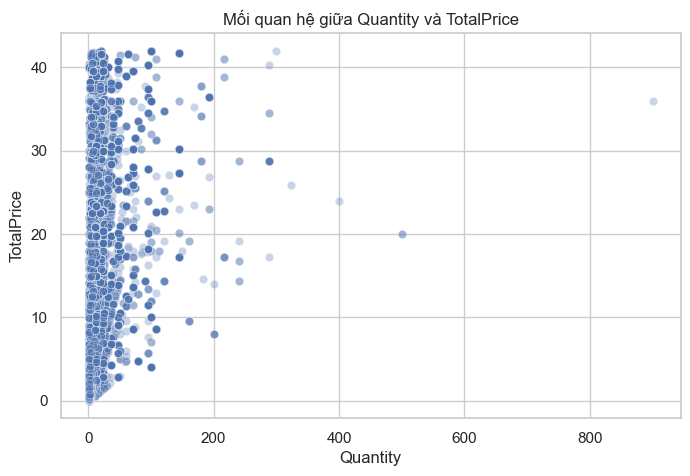

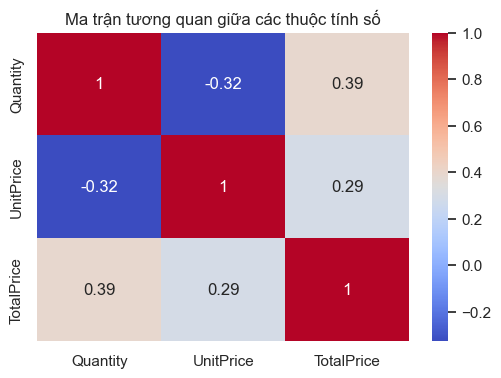

In [10]:
# Scatter plot giữa Quantity và TotalPrice
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='TotalPrice', data=onl_no_outlier, alpha=0.3)
plt.title('Mối quan hệ giữa Quantity và TotalPrice')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.show()

# Ma trận tương quan
corr = onl_no_outlier[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các thuộc tính số')
plt.show()

**Phân tích:**
- Quantity và TotalPrice có mối tương quan dương mạnh (hợp lý vì TotalPrice = Quantity * UnitPrice).
- UnitPrice và Quantity thường không tương quan mạnh, cho thấy giá sản phẩm không ảnh hưởng nhiều đến số lượng mua trong từng giao dịch.
- Ma trận tương quan giúp xác định các thuộc tính liên quan chặt chẽ, hỗ trợ xây dựng mô hình dự báo hoặc phân khúc khách hàng.

# 8. Đưa ra nhận xét và phán đoán dựa trên dữ liệu

Tổng hợp các phát hiện chính, đưa ra phán đoán về hành vi khách hàng, sản phẩm bán chạy, xu hướng theo quốc gia,... dựa trên dữ liệu đã phân tích.

**Nhận xét tổng quan:**
- Dữ liệu Online Retail có nhiều giao dịch nhỏ lẻ, một số giao dịch lớn bất thường (ngoại lệ).
- Khách hàng lớn và quốc gia chủ lực (UK) đóng vai trò quan trọng trong doanh thu.
- Sản phẩm giá thấp bán chạy hơn, số lượng mua thường nhỏ, nhưng có một số giao dịch mua số lượng lớn.
- Ngoại lệ cần được xử lý để tránh ảnh hưởng đến phân tích.
- Mối quan hệ giữa Quantity và TotalPrice rất mạnh, phù hợp với thực tế bán lẻ.

**Phán đoán:**
- Doanh nghiệp nên tập trung vào nhóm khách hàng lớn để tăng doanh thu.
- Cần đa dạng hóa thị trường ngoài UK để mở rộng kinh doanh.
- Sản phẩm giá thấp dễ tiêu thụ, nhưng nên kiểm soát các giao dịch bất thường để tránh rủi ro.
- Dữ liệu sạch và phân tích kỹ giúp đưa ra quyết định kinh doanh chính xác hơn.